### Unidades de observación 
Las peleas de los diferentes eventos realizados por UFC desde 1994 hasta 2021

### Unidad de análisis
Análitica y descriptiva principalmente, aunque también se busca ver las posibilidades de una unidad predictiva (digamos para crear un modelo predictivo de resultados)
### Justificación de datos
Nuestros datos longitudinales ya que tienen "resultados repetitivos" a lo largo del tiempo  
También porque en varias ocasiones a los sujetos les aplican las mismas mediciones

### clasificación de variables/columnas

FIGHT_ID – Nominal  
EVENT_ID – Nominal  
FIGHT_NAME – Nominal  
FIGHT_WEIGHTCLASS – Nominal  
FIGHT_METHOD – Nominal  
ROUND – Ordinal  
TIME – Intervalo  
FIGHT_TIME_FORMAT – Nominal  
FIGHT_REFEREE – Nominal  
FIGHT_DETAILS – Nominal  
MINUTE - Razón  
SECOND - Razón  
DATE_YMD - Intervalo
EVENT_DATE - Intervalo
FIGHT_STUB, EVENT_NAME, EVENT_LOCATION, EVENT_STUB, URL – Nominal  
FIGHT_WINNER – Nominal 

## Alta - Baja Cardinalidad (Nominales)

FIGHT - Alta

EVENT - Alta 

FightWeight - Baja

FightMethod - Alta

FightTimeFormat - Baja

Fight_Referee - Baja

Fight_Details - Alta

Fight_Winner - Alta

FIGHT_STUB EVENT_NAME, EVENT_DATE, EVENT_LOCATION, EVENT_STUB, DATE_YMD, URL – Alta 

FIGHT_WINNER – Alta

## Categoricos balanceados
Round

## Categoricos no balanceados
FIGHT_ID   
EVENT_ID 
FIGHT_NAME
FIGHT_WEIGHTCLASS 
FIGHT_METHOD  
FIGHT_STUB, EVENT_NAME, EVENT_DATE, EVENT_LOCATION, EVENT_STUB, DATE_YMD, URL 
FIGHT_WINNER 

## Division de variables

Juan pedro

Horacio: Analisis univariado de EVENT_DATE, EVENT_LOCATION, FIGHT_WINNER

Yaotecatl
    ROUND - FIGHT_TIME_FORMAT  
    FIGHT_METHOD - FIGHT_WINNER  
    FIGHT_REFEREEE - FIGHT_WINNER
    FIGHT_WINNER - EVENT_LOCATION


### Preguntas de investigacion  


In [25]:
#Importacion de librerias
import numpy as np
import pandas as pd
pd.__version__
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import phik 
from phik import resources, report
import datetime
from datetime import datetime, timedelta, date
from ipywidgets import interact
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
!jupyter nbextension enable --py widgetsnbextension

'2.0.3'

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbextension` not found.


### Cargamos el dataset resultante del univariado

In [26]:
df = pd.read_csv('ufc_stats_after_univariado.csv',encoding='utf-8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6662 entries, 0 to 6661
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FIGHT_ID           6662 non-null   int64 
 1   EVENT_ID           6662 non-null   int64 
 2   FIGHT_NAME         6662 non-null   object
 3   FIGHT_WEIGHTCLASS  6662 non-null   object
 4   FIGHT_METHOD       6662 non-null   object
 5   ROUND              6662 non-null   int64 
 6   TIME               6662 non-null   int64 
 7   FIGHT_TIME_FORMAT  6662 non-null   object
 8   FIGHT_REFEREE      6662 non-null   object
 9   FIGHT_DETAILS      6662 non-null   object
 10  MINUTE             6662 non-null   int64 
 11  SECOND             6662 non-null   int64 
 12  EVENT_NAME         6662 non-null   object
 13  EVENT_DATE         6662 non-null   object
 14  EVENT_LOCATION     6662 non-null   object
 15  FIGHT_WINNER       6662 non-null   object
 16  LOCAL              6662 non-null   object


In [27]:
nominales = ['FIGHT_ID', 'EVENT_ID', 'FIGHT_NAME','FIGHT_METHOD','FIGHT_DETAILS','EVENT_NAME','EVENT_LOCATION','FIGHT_WINNER', 'LOCAL', 'VISITOR']
nominales_baja_cardinalidad = ['FIGHT_WEIGHTCLASS', 'FIGHT_TIME_FORMAT', 'FIGHT_REFEREE', 'GENDER']
ordinales = ['ROUND'] 
intervalo = ['TIME','EVENT_DATE']
razon = ['MINUTE', 'SECOND']

### Analisis de correlación

In [28]:
#Convertimos las cadenas de texto a datos numericos para poder trabajar con ellos
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

label_encoder = LabelEncoder()
time = ['TIME']
df_to_dummy = df[nominales+nominales_baja_cardinalidad+ordinales+razon+time].copy()

for i in (nominales + nominales_baja_cardinalidad):
    df_to_dummy[i] = label_encoder.fit_transform(df_to_dummy[i])



In [29]:
cov = df_to_dummy.cov().round(3)
cov

,FIGHT_ID,EVENT_ID,FIGHT_NAME,FIGHT_METHOD,FIGHT_DETAILS,EVENT_NAME,EVENT_LOCATION,FIGHT_WINNER,LOCAL,VISITOR,FIGHT_WEIGHTCLASS,FIGHT_TIME_FORMAT,FIGHT_REFEREE,GENDER,ROUND,MINUTE,SECOND,TIME
FIGHT_ID,3699075.500,334347.931,226353.245,462.962,17793.230,-78604.370,584.960,55399.433,56484.143,46920.109,962.336,-570.824,10998.548,112.324,-263.935,-213.521,2281.507,-10529.759
EVENT_ID,334347.931,30286.375,20389.292,42.481,1627.644,-7022.723,6.300,5035.608,5090.891,4234.953,85.785,-54.829,956.538,9.881,-24.281,-19.247,207.824,-947.017
FIGHT_NAME,226353.245,20389.292,3585613.314,-21.642,-4574.072,-15125.816,844.477,563426.025,893489.779,-5719.210,95.671,-51.568,896.620,-12.297,2.120,77.107,-429.159,4197.246
FIGHT_METHOD,462.962,42.481,-21.642,4.356,137.271,-8.852,-0.385,1.989,-5.359,-8.115,0.186,-0.210,-0.547,0.035,-1.226,-2.162,25.287,-104.459
FIGHT_DETAILS,17793.230,1627.644,-4574.072,137.271,14625.163,-419.682,0.763,-732.382,-1130.815,-1691.559,1.359,-1.512,-94.175,3.810,-71.279,-135.895,1437.552,-6716.174
EVENT_NAME,-78604.370,-7022.723,-15125.816,-8.852,-419.682,31711.369,704.546,-2626.532,-3703.011,-332.071,-29.201,29.352,-370.843,-1.812,4.976,1.207,-51.369,21.065
EVENT_LOCATION,584.960,6.300,844.477,-0.385,0.763,704.546,1693.568,-7.298,214.876,-461.758,0.267,4.284,32.657,0.178,0.530,-0.618,-0.795,-37.848
FIGHT_WINNER,55399.433,5035.608,563426.025,1.989,-732.382,-2626.532,-7.298,210126.932,140511.664,97576.152,30.493,-14.387,458.967,-3.427,-3.220,2.009,-129.976,-9.456
LOCAL,56484.143,5090.891,893489.779,-5.359,-1130.815,-3703.011,214.876,140511.664,222777.961,-1595.641,25.560,-13.410,222.490,-3.100,0.396,19.075,-108.632,1035.855
VISITOR,46920.109,4234.953,-5719.210,-8.115,-1691.559,-332.071,-461.758,97576.152,-1595.641,376585.662,-27.928,-16.254,747.953,-4.189,8.214,-1.747,-202.945,-307.781


<Axes: >

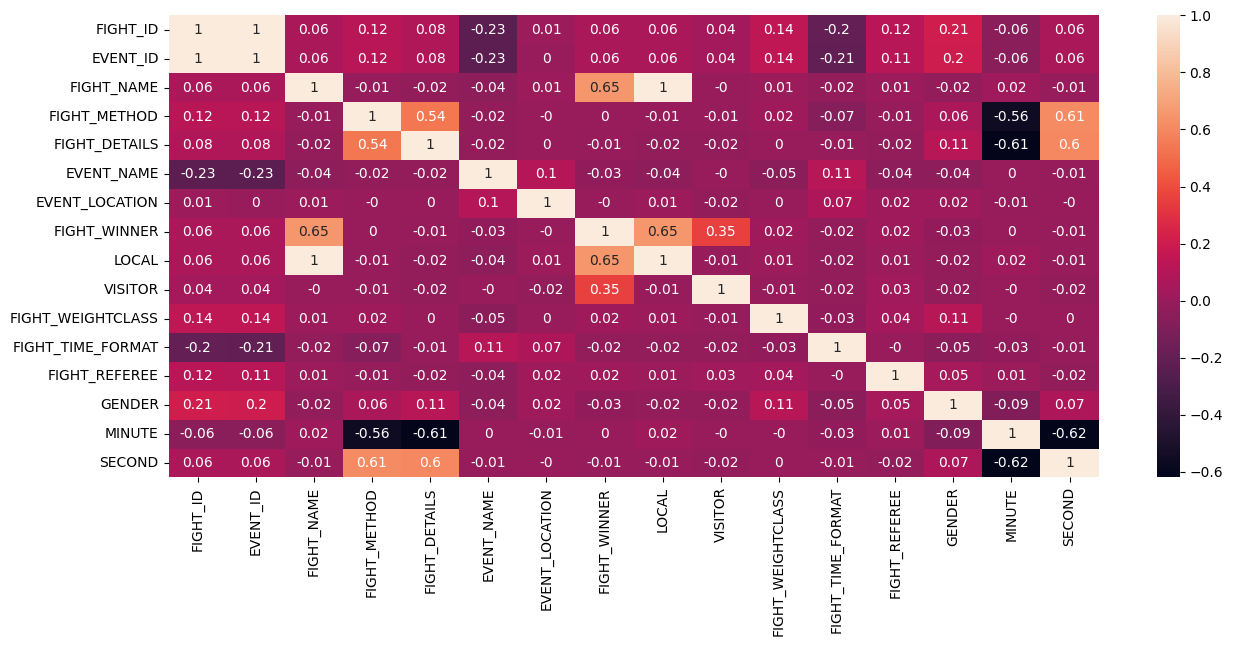

In [30]:
corrKendall = df_to_dummy[nominales + nominales_baja_cardinalidad + razon].corr(method='pearson')  

fig,ax = plt.subplots(figsize=(15,6))
sns.heatmap(corrKendall.round(2),annot=True)
plt.tick_params(axis='x', rotation=90)
plt.show()

In [31]:
tabla_contingencia = pd.crosstab(df['LOCAL'], df['ROUND'])
print(tabla_contingencia)


ROUND               1  2  3  4  5
LOCAL                            
AJ Fletcher         0  0  1  0  0
Aalon Cruz          1  0  0  0  0
Aaron Phillips      0  0  1  0  0
Aaron Riley         0  0  4  0  0
Aaron Rosa          0  0  1  0  0
...                .. .. .. .. ..
Zhalgas Zhumagulov  1  0  0  0  0
Zhang Lipeng        0  0  3  0  0
Zhang Tiequan       1  1  2  0  0
Zhang Weili         2  1  0  0  1
Zubaira Tukhugov    1  0  2  0  0

[1645 rows x 5 columns]


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Peleador Local (LOCAL)')

([], [])

Text(0, 0.5, 'Minuto de Finalización (ROUND)')

Text(0.5, 1.0, 'Scatter Plot: Peleador Local vs. Minuto de Finalización')

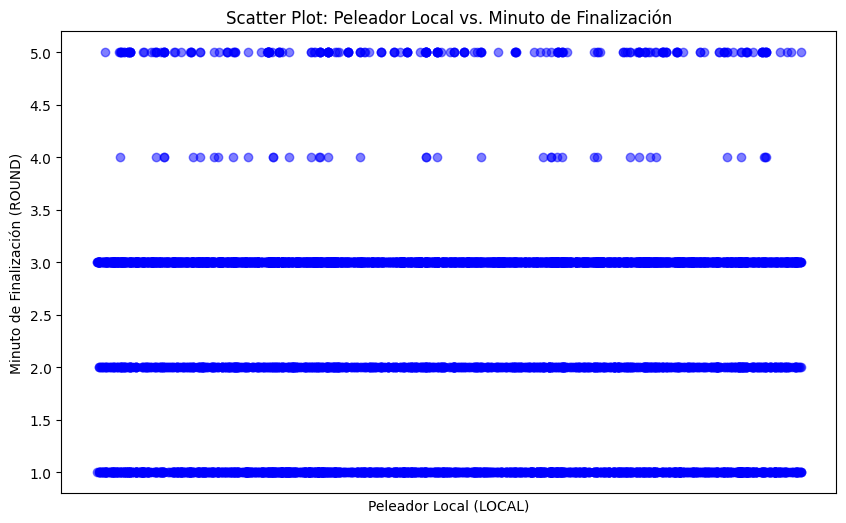

In [32]:
# Crear un scatter plot
plt.figure(figsize=(10, 6))  
plt.scatter(x=df_to_dummy['LOCAL'], y=df_to_dummy['ROUND'], color='blue', alpha=0.5)  

plt.xlabel('Peleador Local (LOCAL)')
plt.xticks([])

plt.ylabel('Minuto de Finalización (ROUND)')
plt.title('Scatter Plot: Peleador Local vs. Minuto de Finalización')

plt.show()



In [33]:
tabla_contingencia = pd.crosstab(df['VISITOR'], df['ROUND'])
print(tabla_contingencia)


ROUND               1  2  3  4  5
VISITOR                          
AJ Dobson           0  0  1  0  0
AJ Fletcher         0  0  1  0  0
Aalon Cruz          1  0  0  0  0
Aaron Brink         1  0  0  0  0
Aaron Phillips      0  1  1  0  0
...                .. .. .. .. ..
Zhalgas Zhumagulov  1  0  3  0  0
Zhang Lipeng        0  0  1  0  0
Zhang Weili         1  0  2  0  1
Zubaira Tukhugov    1  0  4  0  0
Zviad Lazishvili    0  0  1  0  0

[2128 rows x 5 columns]


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Peleador visitante')

([], [])

Text(0, 0.5, 'Round de Finalización')

Text(0.5, 1.0, 'Scatter Plot: Peleador visitante vs. round de Finalización')

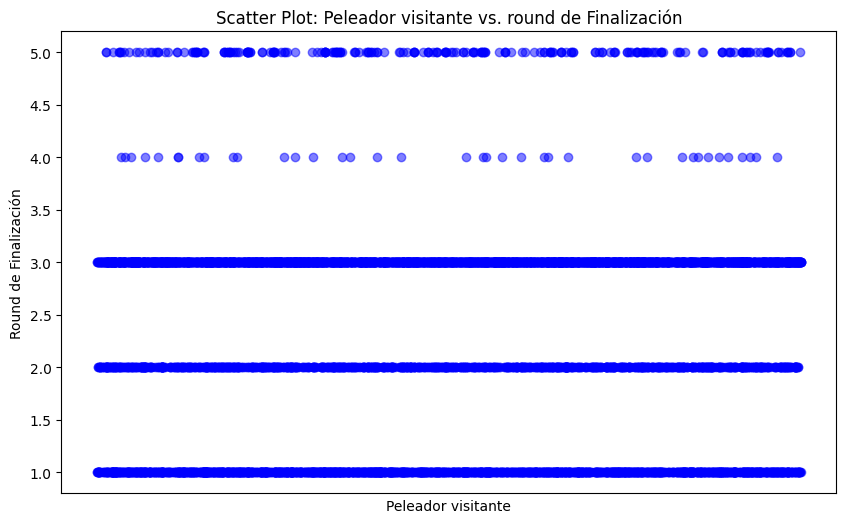

In [34]:
# Crear un scatter plot
plt.figure(figsize=(10, 6))  
plt.scatter(x=df_to_dummy['VISITOR'], y=df_to_dummy['ROUND'], color='blue', alpha=0.5)  

plt.xlabel('Peleador visitante')
plt.xticks([])

plt.ylabel('Round de Finalización')
plt.title('Scatter Plot: Peleador visitante vs. round de Finalización')

plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='FIGHT_METHOD', ylabel='MINUTE'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'decisionsplit'),
  Text(1, 0, 'submission'),
  Text(2, 0, 'decisionunanimous'),
  Text(3, 0, 'kotko'),
  Text(4, 0, 'tkodoctorsstoppage'),
  Text(5, 0, 'decisionmajority'),
  Text(6, 0, 'overturned'),
  Text(7, 0, 'dq'),
  Text(8, 0, 'couldnotcontinue'),
  Text(9, 0, 'other')])

Text(0.5, 0, 'Método de Finalización')

Text(0, 0.5, 'Minuto de Finalización')

Text(0.5, 1.0, 'Minuto de Finalización por Método de Finalización')

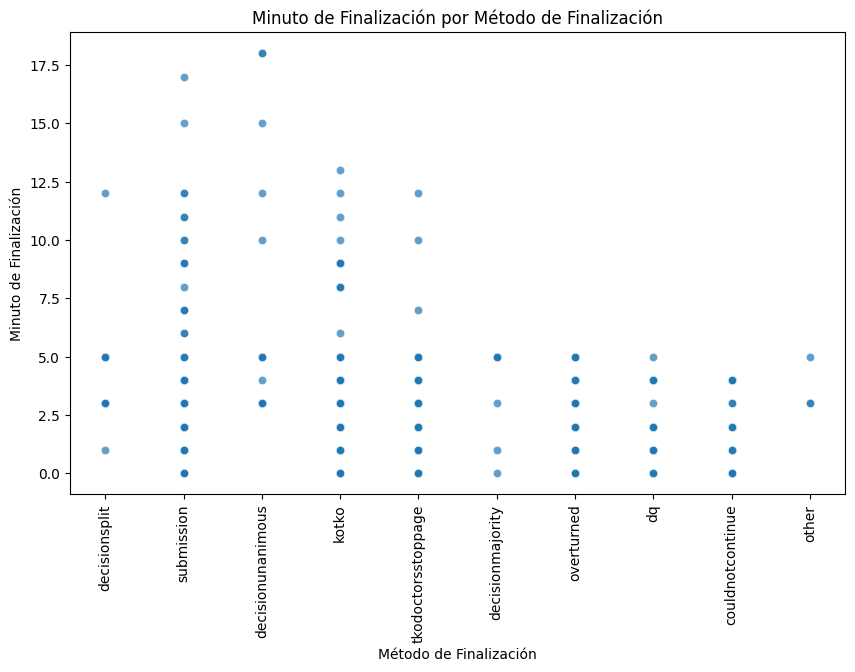

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FIGHT_METHOD', y='MINUTE', data=df, alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel('Método de Finalización')
plt.ylabel('Minuto de Finalización')
plt.title('Minuto de Finalización por Método de Finalización')
plt.show()


<Figure size 1200x600 with 0 Axes>

C:\Users\luffy\AppData\Local\Temp\ipykernel_24904\4079744935.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FIGHT_METHOD', y='MINUTE', data=df, ci=None)  # 'ci=None' elimina los intervalos de confianza


<Axes: xlabel='FIGHT_METHOD', ylabel='MINUTE'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'decisionsplit'),
  Text(1, 0, 'submission'),
  Text(2, 0, 'decisionunanimous'),
  Text(3, 0, 'kotko'),
  Text(4, 0, 'tkodoctorsstoppage'),
  Text(5, 0, 'decisionmajority'),
  Text(6, 0, 'overturned'),
  Text(7, 0, 'dq'),
  Text(8, 0, 'couldnotcontinue'),
  Text(9, 0, 'other')])

Text(0.5, 0, 'Método de Finalización')

Text(0, 0.5, 'Minuto de Finalización')

Text(0.5, 1.0, 'Minuto de Finalización por Método de Finalización')

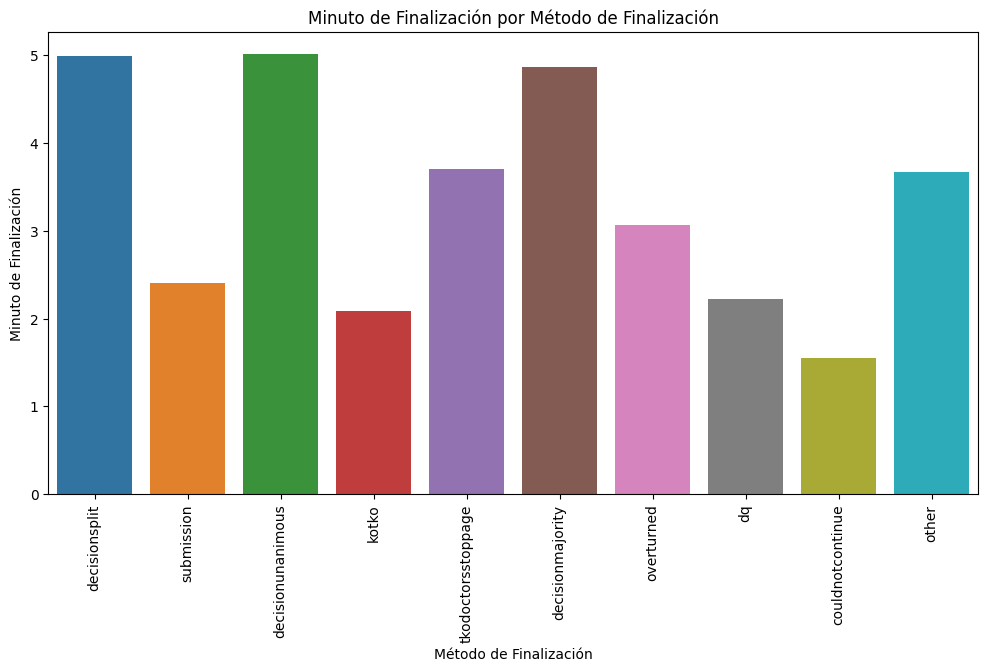

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x='FIGHT_METHOD', y='MINUTE', data=df, ci=None)  # 'ci=None' elimina los intervalos de confianza
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.xlabel('Método de Finalización')
plt.ylabel('Minuto de Finalización')
plt.title('Minuto de Finalización por Método de Finalización')
plt.show()


In [37]:
# plt.figure(figsize=(12, 6))

# # Gráfico de barras agrupado por el método de finalización y coloreado por el ganador
# sns.countplot(x='FIGHT_METHOD', hue='FIGHT_WINNER', data=df, palette='Set1')

# plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
# plt.xlabel('Método de Finalización')
# plt.ylabel('Cantidad de Peleas')
# plt.title('Método de Finalización vs. Ganador de la Pelea')
# plt.legend(title='Ganador', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()


In [38]:
frecuencias = df.groupby('FIGHT_WINNER')['FIGHT_METHOD'].value_counts()

metodo_favorito_por_ganador = frecuencias.groupby(level=0).idxmax().reset_index(name='Método Favorito')

print(metodo_favorito_por_ganador)

              FIGHT_WINNER                        Método Favorito
0              Aaron Riley       (Aaron Riley, decisionunanimous)
1               Aaron Rosa         (Aaron Rosa, decisionmajority)
2            Aaron Simpson     (Aaron Simpson, decisionunanimous)
3     Abdul Razak Alhassan          (Abdul Razak Alhassan, kotko)
4       Abdul-Kerim Edilov            (Abdul-Kerim Edilov, kotko)
...                    ...                                    ...
1578    Zhalgas Zhumagulov       (Zhalgas Zhumagulov, submission)
1579          Zhang Lipeng      (Zhang Lipeng, decisionunanimous)
1580         Zhang Tiequan            (Zhang Tiequan, submission)
1581           Zhang Weili                   (Zhang Weili, kotko)
1582      Zubaira Tukhugov  (Zubaira Tukhugov, decisionunanimous)

[1583 rows x 2 columns]


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Duracion_total_segundos'>

Text(0.5, 0, 'Minutos')

Text(0, 0.5, 'Duración Promedio (segundos)')

Text(0.5, 1.0, 'Patrones Temporales: Duración Promedio de las Peleas')

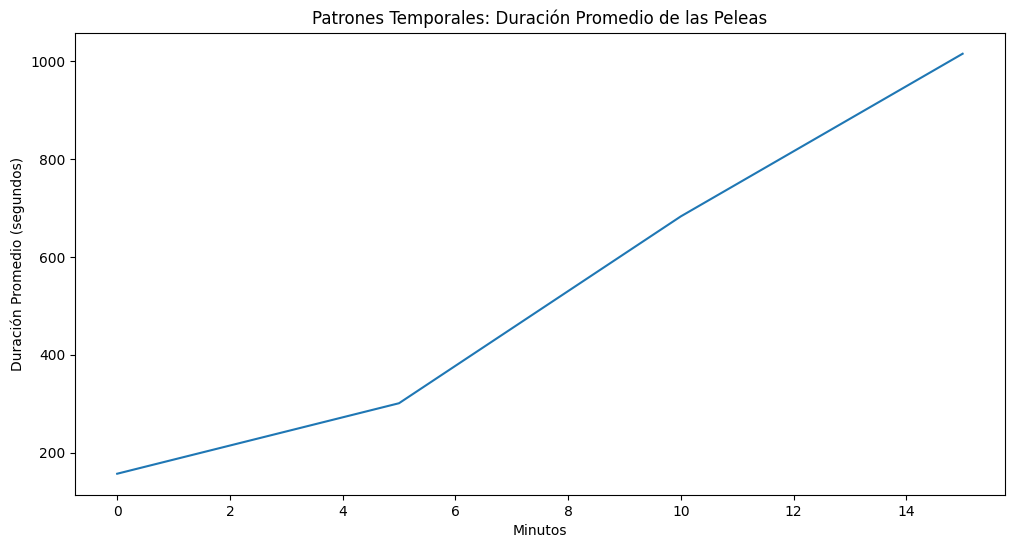

In [39]:
#No le hagan caso es una prueba
# Crea una nueva columna combinando minutos y segundos en segundos totales
df['Duracion_total_segundos'] = df['MINUTE'] * 60 + df['SECOND']

# Convierte la columna de duración total a un formato de tiempo (opcional, dependiendo del análisis)
df['Duracion_total'] = pd.to_timedelta(df['Duracion_total_segundos'], unit='s')

# Agrupa por intervalos de tiempo (por ejemplo, cada 5 minutos) y calcula la duración promedio
intervalos = df.groupby(df['Duracion_total_segundos'] // (5 * 60))['Duracion_total_segundos'].mean()

# Gráfico de línea para mostrar patrones temporales
plt.figure(figsize=(12, 6))
sns.lineplot(x=intervalos.index * 5, y=intervalos.values)
plt.xlabel('Minutos')
plt.ylabel('Duración Promedio (segundos)')
plt.title('Patrones Temporales: Duración Promedio de las Peleas')
plt.show()


*Cambios por Horacio*

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='FIGHT_WEIGHTCLASS', ylabel='count'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'heavyweight'),
  Text(1, 0, 'featherweight'),
  Text(2, 0, 'flyweight'),
  Text(3, 0, 'bantamweight'),
  Text(4, 0, 'lightweight'),
  Text(5, 0, 'welterweight'),
  Text(6, 0, 'middleweight'),
  Text(7, 0, 'strawweight'),
  Text(8, 0, 'catchweight'),
  Text(9, 0, 'openweight'),
  Text(10, 0, 'ultimateultimatetournamenttitle'),
  Text(11, 0, 'ufctournamenttitle'),
  Text(12, 0, 'ufcsuperfightchampionship')])

Text(0.5, 1.0, 'Fight Weight Class vs. Fight Method')

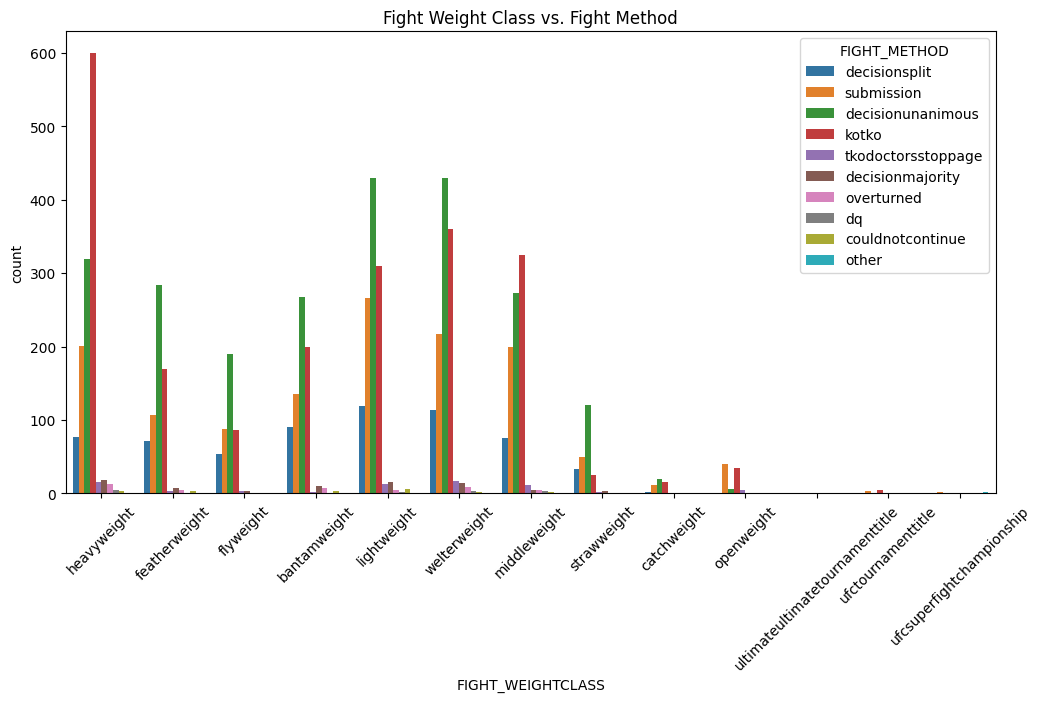

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='FIGHT_WEIGHTCLASS', hue='FIGHT_METHOD')
plt.xticks(rotation=45)
plt.title('Fight Weight Class vs. Fight Method')
plt.show()


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='ROUND', ylabel='count'>

Text(0.5, 1.0, 'Round vs. Fight Method')

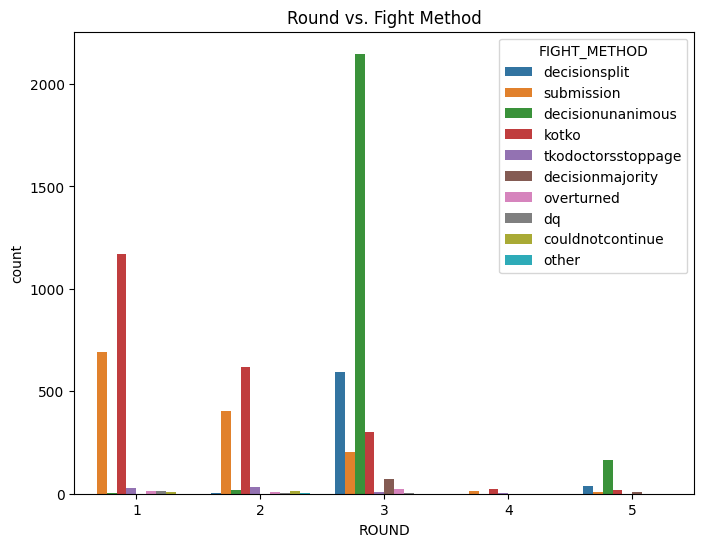

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ROUND', hue='FIGHT_METHOD')
plt.title('Round vs. Fight Method')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='ROUND', ylabel='TIME'>

Text(0.5, 1.0, 'Round vs. Time')

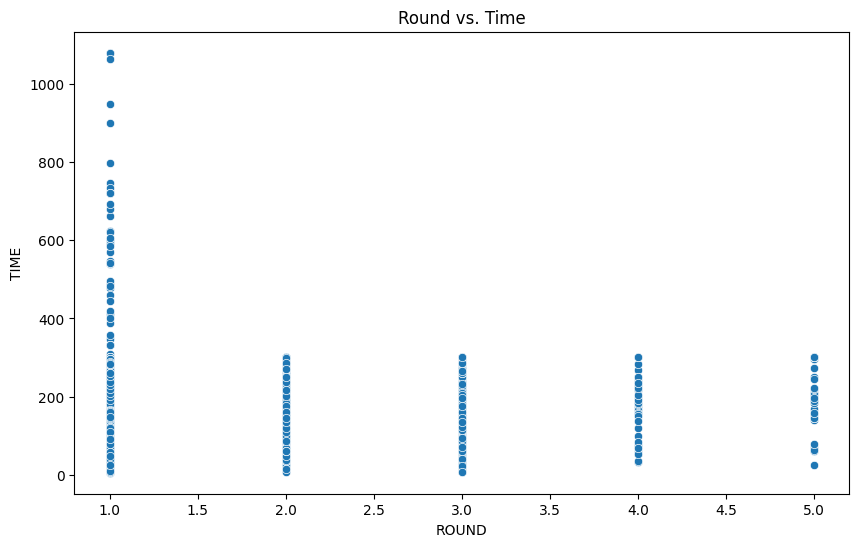

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ROUND', y='TIME')
plt.title('Round vs. Time')
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='FIGHT_WEIGHTCLASS', ylabel='TIME'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'heavyweight'),
  Text(1, 0, 'featherweight'),
  Text(2, 0, 'flyweight'),
  Text(3, 0, 'bantamweight'),
  Text(4, 0, 'lightweight'),
  Text(5, 0, 'welterweight'),
  Text(6, 0, 'middleweight'),
  Text(7, 0, 'strawweight'),
  Text(8, 0, 'catchweight'),
  Text(9, 0, 'openweight'),
  Text(10, 0, 'ultimateultimatetournamenttitle'),
  Text(11, 0, 'ufctournamenttitle'),
  Text(12, 0, 'ufcsuperfightchampionship')])

Text(0.5, 1.0, 'Fight Weight Class vs. Time')

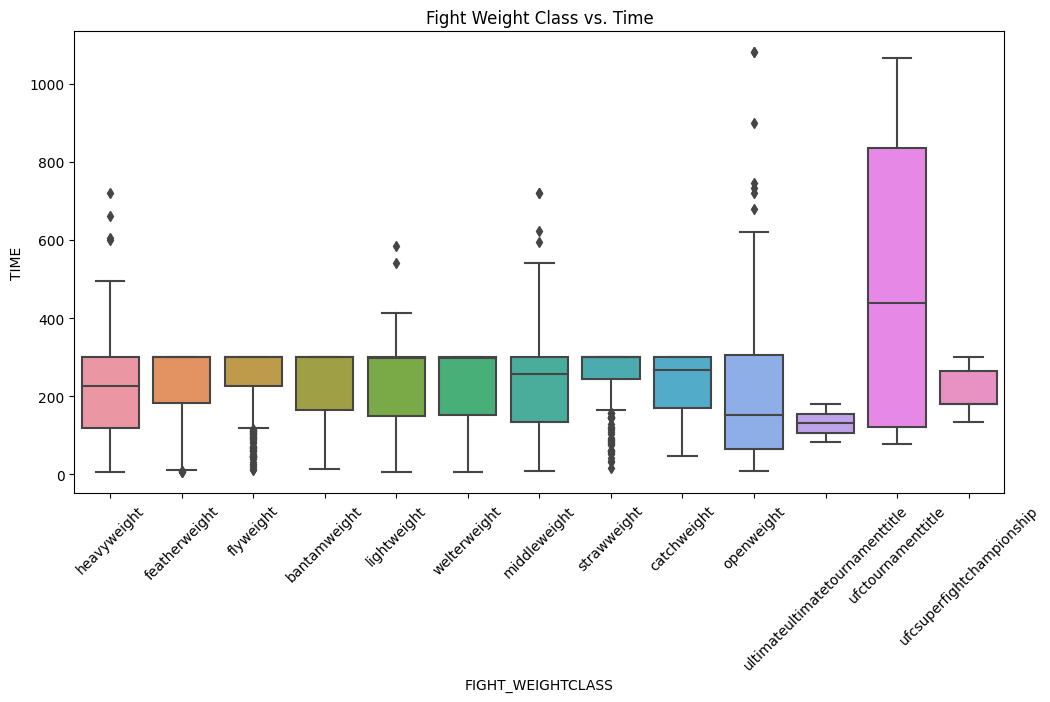

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='FIGHT_WEIGHTCLASS', y='TIME')
plt.xticks(rotation=45)
plt.title('Fight Weight Class vs. Time')
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='FIGHT_TIME_FORMAT', ylabel='TIME'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '3 Rnd (5-5-5)'),
  Text(1, 0, '5 Rnd (5-5-5-5-5)'),
  Text(2, 0, '3 Rnd + OT (5-5-5-5)'),
  Text(3, 0, '1 Rnd + OT (12-3)'),
  Text(4, 0, '1 Rnd (20)'),
  Text(5, 0, '2 Rnd (5-5)'),
  Text(6, 0, '1 Rnd + 2OT (15-3-3)'),
  Text(7, 0, '1 Rnd + OT (15-3)'),
  Text(8, 0, '1 Rnd (15)'),
  Text(9, 0, '1 Rnd + 2OT (24-3-3)'),
  Text(10, 0, '1 Rnd (10)'),
  Text(11, 0, '1 Rnd + OT (27-3)'),
  Text(12, 0, '1 Rnd (18)'),
  Text(13, 0, '1 Rnd + OT (30-5)'),
  Text(14, 0, '1 Rnd + OT (30-3)'),
  Text(15, 0, '1 Rnd (30)'),
  Text(16, 0, '1 Rnd + OT (31-5)'),
  Text(17, 0, 'No Time Limit'),
  Text(18, 0, '1 Rnd (12)')])

Text(0.5, 1.0, 'Fight Time Format vs. Time')

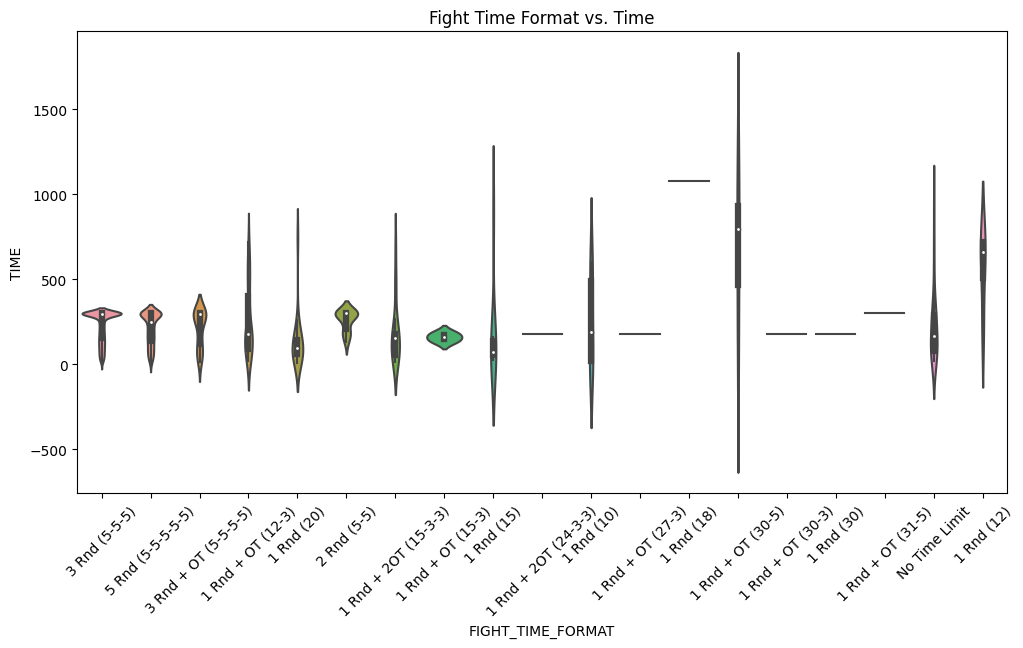

In [44]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='FIGHT_TIME_FORMAT', y='TIME')
plt.xticks(rotation=45)
plt.title('Fight Time Format vs. Time')
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='MINUTE', ylabel='SECOND'>

Text(0.5, 1.0, 'Minute vs. Second')

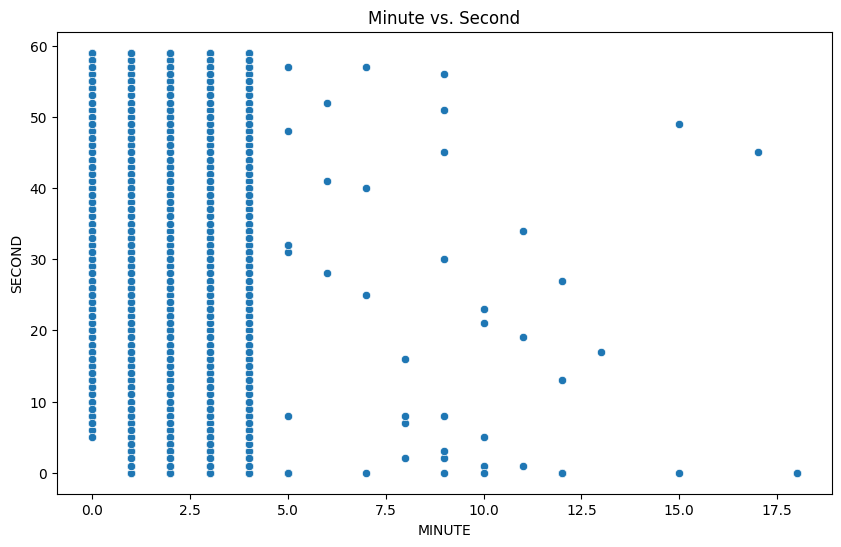

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MINUTE', y='SECOND')
plt.title('Minute vs. Second')
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='TIME', ylabel='FIGHT_TIME_FORMAT'>

Text(0.5, 1.0, 'Round Duration vs. Total Fight Time')

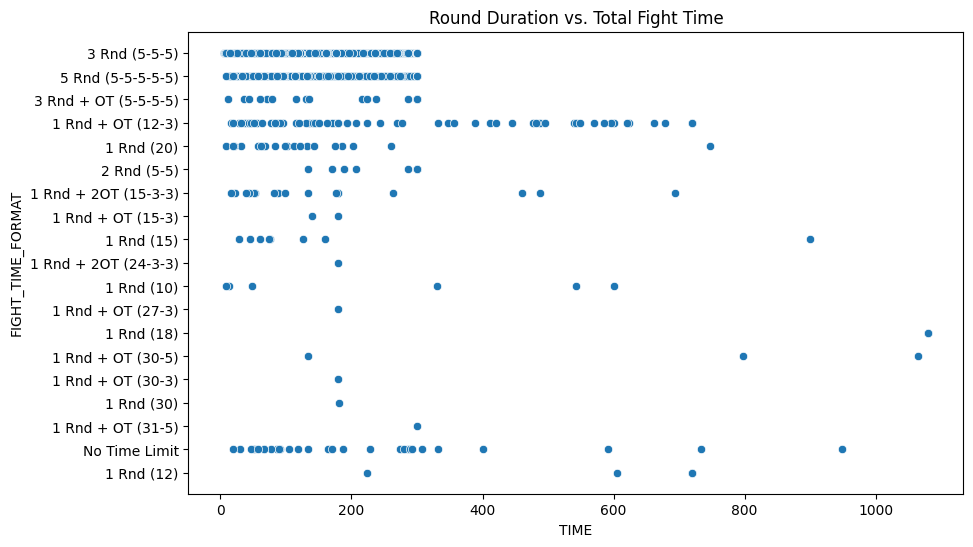

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TIME', y='FIGHT_TIME_FORMAT')
plt.title('Round Duration vs. Total Fight Time')
plt.show()


In [51]:
#Creamos una columna con el tiempo total de la pelea en segundos
def formatear_tiempo(row):
    return row['MINUTE']*60+row['SECOND']

df['TIME'] = df.apply(formatear_tiempo, axis=1)
df['TIME']

0       300
1       218
2       300
3       300
4       300
       ... 
6657    144
6658    300
6659    300
6660    287
6661    300
Name: TIME, Length: 6662, dtype: int64

In [57]:
# Convertimos la columna GENDER a 1 y 0 para poder hacer operaciones
def gender_To_Bin(row):
    return 0 if row['GENDER'] == 'male' else 1


df['gender_bin'] = df.apply(gender_To_Bin, axis=1)
df['gender_bin']


0       0
1       0
2       0
3       1
4       1
       ..
6657    0
6658    0
6659    0
6660    0
6661    0
Name: gender_bin, Length: 6662, dtype: int64

In [58]:
# Subconjunto para hombres (gender_bin = 0)
hombres = df[df['gender_bin'] == 0]

# Subconjunto para mujeres (gender_bin = 1)
mujeres = df[df['gender_bin'] == 1]


,FIGHT_ID,EVENT_ID,FIGHT_NAME,FIGHT_WEIGHTCLASS,FIGHT_METHOD,ROUND,TIME,FIGHT_TIME_FORMAT,FIGHT_REFEREE,FIGHT_DETAILS,...,EVENT_LOCATION,FIGHT_WINNER,LOCAL,VISITOR,GENDER,YearMonth,Duracion_total_segundos,Duracion_total,TIME_numerico,gender_bin
0,10647,1227,Glover Teixeira v Nikita Krylov,heavyweight,decisionsplit,3,300,3 Rnd (5-5-5),Yves Lavigne,Decision - Split,...,"Vancouver, British Columbia, Canada",Glover Teixeira,Glover Teixeira,Nikita Krylov,male,2019-09,300,0 days 00:05:00,5.000000,0
1,10651,1227,Misha Cirkunov v Jimmy Crute,heavyweight,submission,1,218,3 Rnd (5-5-5),Yves Lavigne,Peruvian Necktie On Ground,...,"Vancouver, British Columbia, Canada",Misha Cirkunov,Misha Cirkunov,Jimmy Crute,male,2019-09,218,0 days 00:03:38,3.633333,0
2,10655,1227,Chas Skelly v Jordan Griffin,featherweight,decisionunanimous,3,300,3 Rnd (5-5-5),Yves Lavigne,Decision,...,"Vancouver, British Columbia, Canada",Chas Skelly,Chas Skelly,Jordan Griffin,male,2019-09,300,0 days 00:05:00,5.000000,0
5,10842,1243,Cub Swanson v Shane Burgos,featherweight,decisionsplit,3,300,3 Rnd (5-5-5),Yves Lavigne,Decision - Split,...,"Ottawa, Ontario, Canada",Shane Burgos,Cub Swanson,Shane Burgos,male,2019-05,300,0 days 00:05:00,5.000000,0
7,10850,1243,Arjan Bhullar v Juan Adams,heavyweight,decisionunanimous,3,300,3 Rnd (5-5-5),Yves Lavigne,Decision,...,"Ottawa, Ontario, Canada",Arjan Bhullar,Arjan Bhullar,Juan Adams,male,2019-05,300,0 days 00:05:00,5.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6657,15070,1613,George Sotiropoulos v Roman Mitichyan,welterweight,kotko,2,144,3 Rnd (5-5-5),Adam Martinez,Punches to Head From Mount,...,"Broomfield, Colorado, USA",George Sotiropoulos,George Sotiropoulos,Roman Mitichyan,male,2008-04,144,0 days 00:02:24,2.400000,0
6658,12586,1388,Chris Kelades v Chris Beal,flyweight,decisionsplit,3,300,3 Rnd (5-5-5),Adam Cheadle,Decision - Split,...,"Saskatoon, Saskatchewan, Canada",Chris Kelades,Chris Kelades,Chris Beal,male,2015-08,300,0 days 00:05:00,5.000000,0
6659,12587,1388,Shane Campbell v Elias Silverio,lightweight,decisionunanimous,3,300,3 Rnd (5-5-5),Adam Cheadle,Decision,...,"Saskatoon, Saskatchewan, Canada",Shane Campbell,Shane Campbell,Elias Silverio,male,2015-08,300,0 days 00:05:00,5.000000,0
6660,13629,1481,Sam Stout v James Krause,lightweight,submission,3,287,3 Rnd (5-5-5),Adam Cheadle,Guillotine Choke From Bottom Guard,...,"Winnipeg, Manitoba, Canada",James Krause,Sam Stout,James Krause,male,2013-06,287,0 days 00:04:47,4.783333,0


In [59]:
from scipy.stats import ttest_ind

# Realizar una prueba t de dos muestras para comparar las duraciones de las peleas entre hombres y mujeres
t_stat, p_valor = ttest_ind(hombres['TIME'], mujeres['TIME'], equal_var=False)

# Imprimir el resultado de la prueba
print("Estadístico t:", t_stat)
print("Valor p:", p_valor)

# Interpretación del resultado
alpha = 0.05  # Nivel de significancia
if p_valor < alpha:
    print("Rechazamos la hipótesis nula (Ho). Hay una diferencia significativa en la duración promedio de las peleas entre hombres y mujeres.")
else:
    print("No podemos rechazar la hipótesis nula (Ho). No hay suficiente evidencia para afirmar que hay una diferencia significativa en la duración promedio de las peleas entre hombres y mujeres.")


Estadístico t: -8.820271802899907
Valor p: 7.10214513670566e-18
Rechazamos la hipótesis nula (Ho). Hay una diferencia significativa en la duración promedio de las peleas entre hombres y mujeres.
